<a href="https://colab.research.google.com/github/SonyaTrubitsyna/Laba4/blob/main/Lab4_all__Sonya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [41]:
x_11 = np.random.randint(1, 11, 50)
x_12 = np.random.randint(1, 11, 50)
x_13 = np.random.randint(1, 11, 50)

x_21 = np.random.randint(1, 11, 50)
x_22 = np.random.randint(1, 11, 50)
x_23 = np.random.randint(1, 11, 50)
x1 = np.concatenate ((x_11, x_12, x_13))
x2 = np.concatenate ((x_21, x_22, x_23))
x = {'x1': x1, 'x2': x2}


In [42]:
X = pd.DataFrame(data = x, columns=['x1', 'x2'])
X.to_excel('data_all.xlsx')

In [43]:
X.head()

,x1,x2
0,2,5
1,1,4
2,9,8
3,3,5
4,5,7


Text(0, 0.5, 'увлекательность (баллы)')

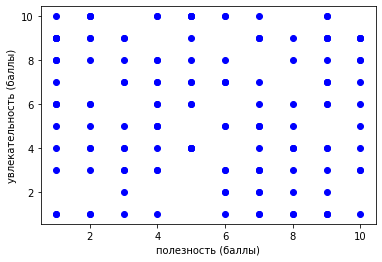

In [44]:
plt.scatter(X['x1'], X['x2'], color='blue')
plt.xlabel('полезность (баллы)')
plt.ylabel('увлекательность (баллы)')

In [45]:
from sklearn.cluster import KMeans

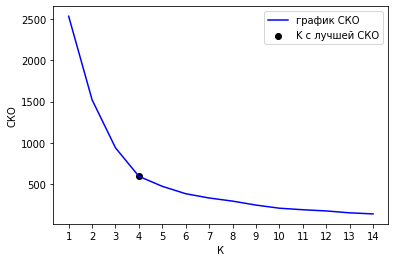

In [46]:
k_rng = range(1, 15)
sse = []
for i in k_rng:
    km = KMeans(n_clusters=i)
    km.fit_transform(X)
    sse.append(km.inertia_)
    
fig, ax = plt.subplots()
ax.plot(k_rng, sse, color='blue', label='график СКО')
ax.set_xticks(np.arange(1,15))
ax.set_xlabel('К')
ax.set_ylabel('СКО')
ax.scatter(4, sse[3], color='black', label='K с лучшей СКО') #надо вместо 3 и sse[i] (вместо i) поставить 
# два других значения,в соответствии с данными
ax.legend()

In [47]:
X

,x1,x2
0,2,5
1,1,4
2,9,8
3,3,5
4,5,7
...,...,...
145,1,5
146,4,5
147,1,3
148,3,9


In [50]:
km1 = KMeans(n_clusters=4)
y_predicted = km1.fit_predict(X)
X['cluster'] = y_predicted 
X.head()
X.to_excel('data_all2.xlsx')
# y_predicted

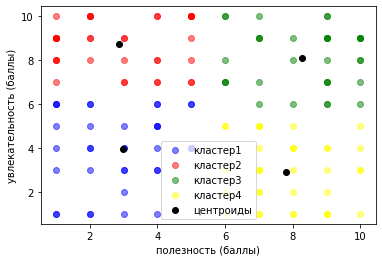

In [51]:
df1=X[X.cluster==0]
df2=X[X.cluster==1]
df3=X[X.cluster==2]
df4=X[X.cluster==3]
fig, ax = plt.subplots()
ax.scatter(df1['x1'], df1['x2'], alpha=0.5, color='blue', label='кластер1')
ax.scatter(df2['x1'], df2['x2'], alpha=0.5, color='red', label='кластер2')
ax.scatter(df3['x1'], df3['x2'], alpha=0.5, color='green', label='кластер3')
ax.scatter(df4['x1'], df4['x2'], alpha=0.5, color='yellow', label='кластер4')
ax.scatter(km1.cluster_centers_[:, 0], km1.cluster_centers_[:, 1], color='black', label='центроиды')
ax.set_xlabel('полезность (баллы)')
ax.set_ylabel('увлекательность (баллы)')
ax.legend()
plt.show()

In [52]:
y_predicted

array([0, 0, 2, 0, 1, 2, 1, 0, 2, 2, 2, 3, 1, 3, 0, 0, 0, 1, 0, 0, 0, 1,
       2, 2, 2, 3, 0, 3, 3, 2, 0, 3, 0, 2, 3, 3, 2, 1, 0, 1, 1, 0, 1, 1,
       3, 3, 1, 1, 1, 1, 0, 0, 2, 0, 3, 1, 3, 2, 2, 3, 2, 2, 2, 2, 3, 2,
       2, 1, 3, 0, 0, 3, 2, 3, 3, 1, 1, 0, 2, 2, 1, 3, 3, 3, 1, 1, 0, 3,
       3, 2, 0, 1, 1, 1, 3, 3, 2, 3, 3, 0, 0, 2, 3, 2, 1, 0, 0, 0, 0, 2,
       1, 3, 0, 1, 0, 3, 1, 2, 1, 3, 1, 3, 0, 2, 2, 2, 3, 0, 1, 1, 3, 3,
       1, 3, 1, 0, 1, 3, 3, 2, 0, 1, 2, 2, 0, 0, 0, 0, 1, 1], dtype=int32)

In [53]:
X['cluster'] = X['cluster'].map({0: 'кластер1', 1: 'кластер2', 2: 'кластер3', 3: 'кластер4'})
